# The Multi-Tier Framework for measuring access to cooking solutions (Nepal)

### Preliminaries

According to [the MTF survey data](https://mtfenergyaccess.esmap.org/country/nepal), as of 2017, **62.7%** of Nepalese households **use a three-stone stove or traditional stove** as their primary stove and **26.3% use an LPG stove**.  Using the MTF definition, **25.7%** of the households in Nepal **are in MTF Tiers 3 or above.**

To learn more about energy access in Nepal, download MTF’s Country Diagnostic Report, [here](https://mtfenergyaccess.esmap.org/force-download/1527)

## General information

### Typologies of cookstoves

The various types of cookstove used in Nepal were classified into seven stove categories (see box 2 of the report for details & pictures):

- **Open fire biomass:** The most traditional method of cooking in Nepal. A pot is balanced on three stones over an open fire and fuel placed on the ground. 
- **Traditional biomass:** These are locally produced using available and low-cost materials and fuels, reflecting cultural practices. A Pot placed above fire on the enclosed combustion chamber while the fuel rests on ground.
- **Improved biomass:** The improved biomass stove uses newer stove technology compared to traditional stoves to improve efficiency, cleanliness, and safety. They may be built with local materials or be factory manufactured. In addition, improved biomass stoves may have some exhaust system.
- **Biogas:** The digester converts organic wastes and dung into combustible methane gas called biogas, which is piped from the digester to the cookstove.
- **Solar cookstoves:** Often called solar cookers, can be used in areas where solar energy is abundant for most of the year, typically between 30 degrees north and south of the equator. There are several types of solar cookers: panel cookers with a clamshell shape, box cookers that fully enclose the pot, parabolic cookers that resemble a satellite dish, and vacuum tube cookers that work like greenhouses.
- **Liquefied petroleum gas (LPG):** Exclusively burn LPG, which is a gaseous fuel obtained during petroleum refining and consists mainly of butane or propane. For distribution to the end-user, LPG is bottled in individual gas cylinders of various sizes (between 3 kg and 50 kg or larger).
- **Electric cookstoves:** Convert electrical energy into heat for cooking. Electric stoves can be either an induction type stove or an electric coil stove

> The last 4 are considered as clean stove types

## Analysis

Measuring access to modern energy cooking solutions in Nepal is crucial, as the country has historically relied heavily on solid biomass, and making concerted efforts to change this trend is key to numerous potential positive outcomes.

> The questions related to cooking are in the sections I & J. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from IPython.display import Image
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
#main_dataset = pd.read_stata('raw_data/dta/maindataset.dta')
main_dataset = pd.read_csv('raw_data/csv/main.csv')
main_dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
main_dataset.head()

,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,M32,M33,O1,O2,O2_SO,O2_SO_Recode,O3,O3_con,O4,TIME_END_VISIT1
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,8000.0,5000.0,1,1.0,NaN,NaN,8.0,0.406990,1200000.0,2017-11-11T02:49:33Z
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,15.0,0.763106,2000000.0,2017-11-11T04:04:27Z
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,15000.0,10000.0,1,1.0,NaN,NaN,9.0,0.457863,1350000.0,2017-11-11T04:47:09Z
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,8.0,0.406990,1000000.0,2017-11-11T05:41:59Z
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,5.0,0.254369,600000.0,2017-11-11T07:00:32Z


In [4]:
#Extracting columns corresponding to Household information and Cooking Questions (I & J Sections)
all_columns = main_dataset.columns
household_info_columns = all_columns[:19]

In [5]:
I_section = [column for column in all_columns if column.startswith('I')]
I_section = I_section[2:]
I_section.sort()

In [6]:
J_section = [column for column in all_columns if column.startswith('J')]
J_section.sort()

In [7]:
target_columns = list(itertools.chain(household_info_columns ,I_section ,J_section))

In [8]:
cooking = main_dataset[target_columns]

In [9]:
cooking.head()

,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,J3__4,J3__5,J3__6,J3__7,J3__8,J40,J41,J42,J43,J44
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,15.0,10.0,3.0,8.0,4.0
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,6.0,9.0,1.0,5.0,2.0
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,7.0,NaN,1.0,6.0,2.0
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,9.0,6.0,1.0,5.0,3.0
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,8.0,NaN,1.0,5.0,2.0


### Fuels used for cooking

In Nepal, households are still heavily reliant on biomass to meet their cooking needs. The share of the
total households using a fuel indicates the nationwide dependency on different fuel types. Firewood
is the most widely used source of cooking fuel.

As seen on the image below, the responses corresponding to this part are in section `I2` and up to 18 possible types were to be multiselected.

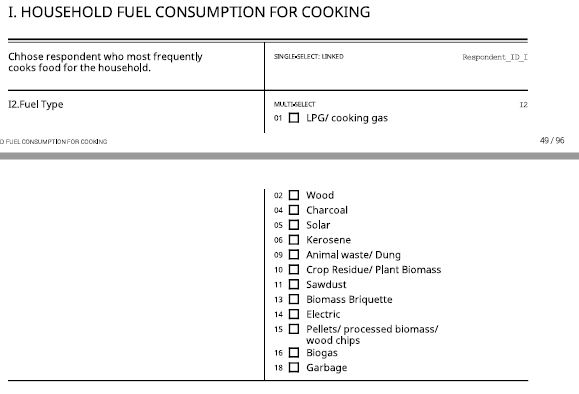

In [10]:
Image('references/fuel type.JPG')

In [11]:
#Extracting columns related to the fuel type
fuel_response_columns = [column for column in I_section if column.startswith('I2')]
fuel_type = cooking[fuel_response_columns]

In [12]:
fuel_type.head()

,I2__1,I2__10,I2__11,I2__13,I2__14,I2__15,I2__16,I2__18,I2__2,I2__4,I2__5,I2__6,I2__9
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
#Replacing the columns' name with corresponding fuel type in questionaire dictionary
columns_mapping = {'I2__1':'LPG/Cooking gas', 'I2__10':'Crop Residue/Plant Biomas', 'I2__11':'Sawdust',
                   'I2__13':'Biomas Briquette', 'I2__14':'Electric', 'I2__15':'Pellets/Processes biomass/wood chips',
                   'I2__16':'Biogas', 'I2__18':'Garbage', 'I2__2':'Wood', 'I2__4':'Charcoal', 'I2__5':'Solar',
                   'I2__6':'Kerosene', 'I2__9':'Animal waste/Dung'}
fuel_type = fuel_type.rename(columns = columns_mapping)

#Replacing the answer No with False and Yes with True to easy the calculations
#response_mapping = {'0':False, '1':True}
#fuel_type = fuel_type.replace(response_mapping)

In [14]:
fuel_type.head()

,LPG/Cooking gas,Crop Residue/Plant Biomas,Sawdust,Biomas Briquette,Electric,Pellets/Processes biomass/wood chips,Biogas,Garbage,Wood,Charcoal,Solar,Kerosene,Animal waste/Dung
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [15]:
#Calculating the percentage contribution and considering only the fuel type reported in the report
fuel_type_df = (fuel_type.sum()*100/6000).to_frame().reset_index().rename(columns = {'index':'Fuel Type', 0:'% Population'})

In [16]:
types_mapping = {'Electric':'Electric/Solar', 'Solar':'Electric/Solar', 'Animal waste/Dung':'Dung',
                'Crop Residue/Plant Biomas':'Crop residue', 'Pellets/Processes biomass/wood chips':'Processed biomas'}
fuel_type_df['Fuel Type'] = fuel_type_df['Fuel Type'].replace(types_mapping)

In [17]:
fuel_type_df = fuel_type_df.groupby(['Fuel Type']).sum().reset_index()

In [18]:
#Extracting only those reported & fixing the counts to 1 decimal
fuel_type_df = fuel_type_df[~fuel_type_df['Fuel Type'].isin(['Biomas Briquette','Kerosene','Garbage'])]

In [19]:
fuel_type_df['% Population'] = fuel_type_df['% Population'].apply(lambda x: round(x,1))
fuel_type_df

,Fuel Type,% Population
0,Biogas,1.9
2,Charcoal,0.2
3,Crop residue,1.2
4,Dung,3.3
5,Electric/Solar,0.5
8,LPG/Cooking gas,39.3
9,Processed biomas,0.1
10,Sawdust,0.2
11,Wood,68.5


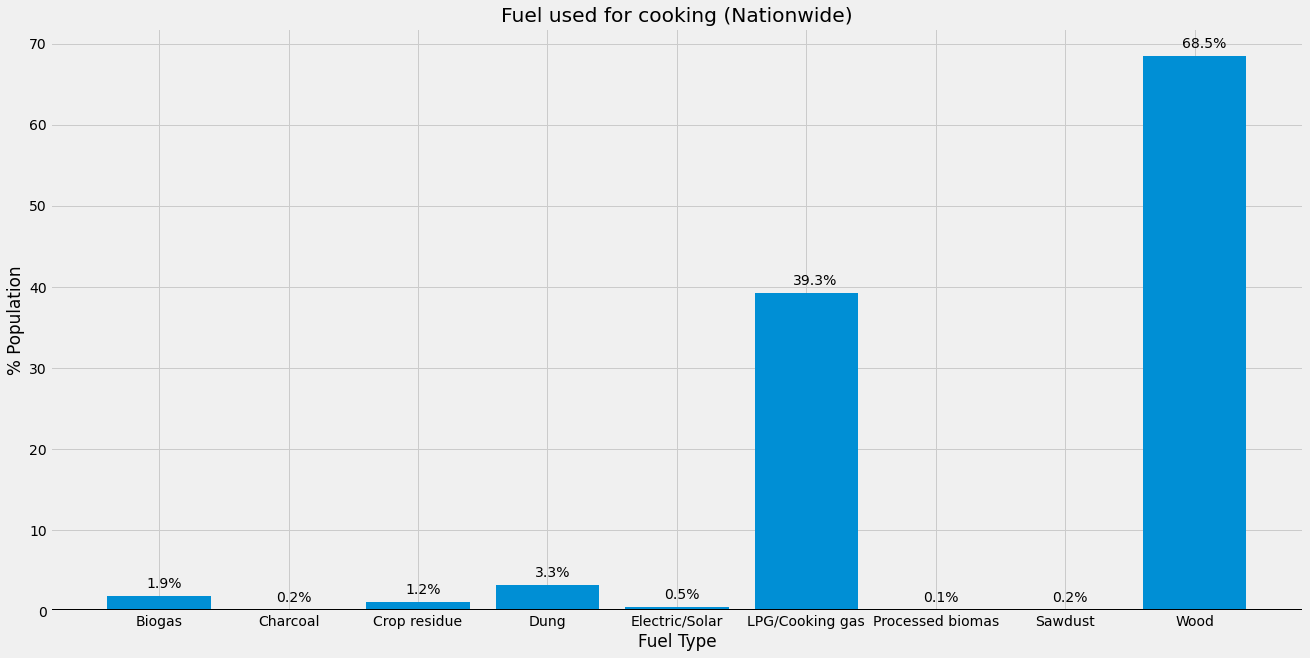

In [20]:
#Ploting the result
plt.figure(figsize = (20,10))
plt.bar(fuel_type_df['Fuel Type'], fuel_type_df['% Population']);
plt.axhline(0, color = 'black')
plt.title('Fuel used for cooking (Nationwide)')
plt.ylabel('% Population')
plt.xlabel('Fuel Type')
for i,pop in enumerate(fuel_type_df['% Population']):
    plt.text(i-0.1,pop+1, f'{pop}%')

> The numbers from this analysis are small compared to what is in the report!

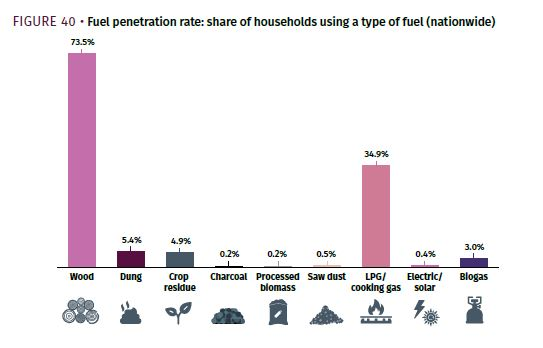

In [21]:
Image('references/Fuel penetration rate nationwide.JPG')

### Distribution of Primary Stoves (Urban - Rural)

In urban areas, about half of the households use a clean-fuel stove as their primary stove. Biomass stove users are the overwhelming majority in rural areas.

Answers related to this question is in Section J Question 3. Whether a household is in urban or rural area can be found in column `LOCALITY` of the main dataset.

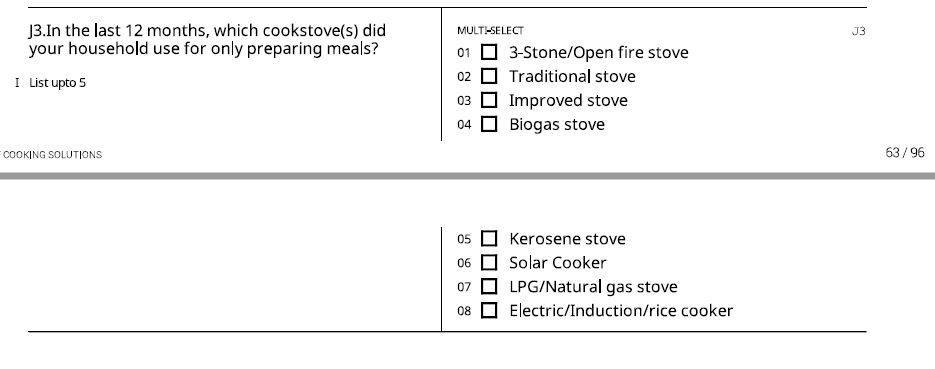

In [22]:
Image('references/cookstove(s) used for preparing meals.JPG')

In [23]:
#cookstoves = pd.read_stata('raw_data/dta/J_Cookstove.dta')
cookstoves = pd.read_csv('raw_data/csv/J.csv')

In [24]:
cookstoves.head(2)

,Unnamed: 0,HHID,Id,J4,J5,J6,J7,J7_SO,J7_SO_RECODE,J8,...,J35__6,J35__7,J35__8,J35__9,J35__10,J35__555,J35_SO,J35_SO_RECODE,J37_A,J37_B
0,1,110148801,3,2.0,NaN,NaN,4.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2,110148802,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [25]:
stoves_mapping = {1:'3-Stone/Open fire stove', 2:'Traditional stove', 3:'Improved stove',
                 4:'Biogas stove', 5:'Kerosene stove', 6:'Solar Cooker',
                 7:'LPG/Natural gas stove',8:'Electric/Induction/rice cooker'}

cookstoves['Type'] = cookstoves['Id'].replace(stoves_mapping)

In [26]:
# # Check if this is necessary in order to gather more stoves per households
import numpy as np
stove_labels = np.unique(cookstoves["Id"])

hh_stoves = []
for index,row in main_dataset.iterrows():
    df = cookstoves.loc[cookstoves["HHID"]==row["HHID"]]
    hh_stoves.append(df["Type"].tolist())
    


main_dataset["Stoves"]=hh_stoves



> Didn't get it and running it is giving an error or an empty list. I think it is related to stove stacking discussed in the next section

> (ALFONSO)Made same fix - now it works.

In [27]:
#Combining the cookstove types with localities using the HHID and counting the percentages in each locality
cookstoves_locality = pd.merge(cookstoves, main_dataset[['HHID','LOCALITY']], how = 'left', on = 'HHID')
locality_mappings = {1:'Urban', 2:'Rural'}
cookstoves_locality['LOCALITY'].replace(locality_mappings, inplace = True)
cookstoves_locality = cookstoves_locality[['LOCALITY','Type']].groupby(['Type','LOCALITY']).size().unstack()
cookstoves_locality.columns = cookstoves_locality.columns.to_list() # Removing the categorical columns
cookstoves_locality.reset_index(inplace = True)

In [28]:
cookstoves_locality

,Type,Rural,Urban
0,3-Stone/Open fire stove,738.0,458.0
1,Biogas stove,68.0,72.0
2,Electric/Induction/rice cooker,5.0,49.0
3,Improved stove,385.0,215.0
4,Kerosene stove,NaN,1.0
5,LPG/Natural gas stove,543.0,1799.0
6,Solar Cooker,NaN,1.0
7,Traditional stove,1372.0,1204.0


In [29]:
#Mapping Ids to names used in the report & removing those with 0 or 1 frequency
ids_mapping = {'3-Stone/Open fire stove':'Open fire stove', 'Electric/Induction/rice cooker':'Electric'}
cookstoves_locality.replace(ids_mapping, inplace = True)
cookstoves_locality = cookstoves_locality[cookstoves_locality['Rural'].notnull()]

In [30]:
#Finding the percentages
cookstoves_locality['Urban'] = round((cookstoves_locality['Urban']/sum(cookstoves_locality['Urban'])*100),1)
cookstoves_locality['Rural'] = round((cookstoves_locality['Rural']/sum(cookstoves_locality['Rural'])*100),1)
cookstoves_locality.set_index('Type', inplace = True)

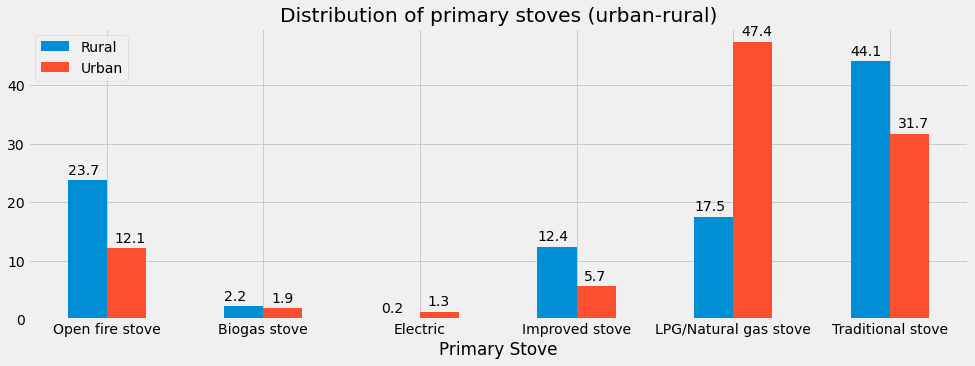

In [31]:
#Ploting
cookstoves_locality.plot.bar(figsize = (15,5))
urban = cookstoves_locality['Urban']
rural = cookstoves_locality['Rural']

for i in range(len(urban)):
    plt.text(i+0.05,urban[i] + 1, f'{urban[i]}')
    plt.text(i-0.25,rural[i] + 1, f'{rural[i]}')

plt.title('Distribution of primary stoves (urban-rural)')
plt.xlabel('Primary Stove')
plt.xticks(rotation = 0);

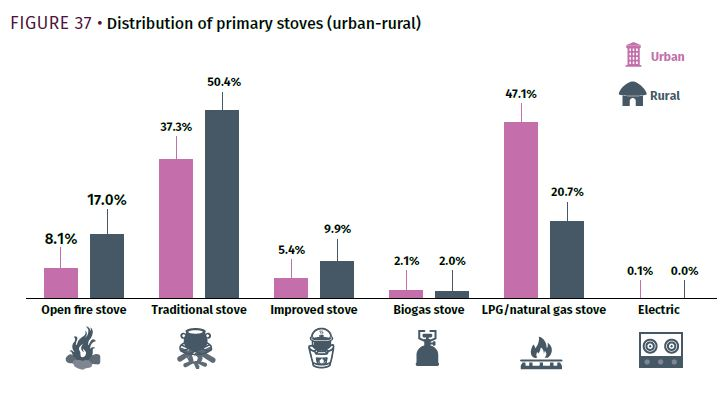

In [32]:
Image('references/Distribution of primary stoves.JPG')

> Values in the reports are higher except for the Electric and Open fire stove they are lower.

### Stove Stacking

#### Number of stoves

While most of the households in Nepal use only one type of stove, there are some households that use two or more different types at the same time. Most households that stack use an LPG stove along with a biomass stove. The two most common forms of stacking are to use an LPG stove with a traditional stove or with an open fire stove.

In [33]:
cookstoves_stack = (cookstoves['HHID'].value_counts().to_frame()['HHID'].value_counts(normalize=True, ascending = True)*100).to_frame()
cookstoves_stack.reset_index(inplace = True)
cookstoves_stack.columns = ['Number of stoves', '% Households']
cookstoves_stack.replace({1 : '1 Stove', 2 : '2 Stoves', 3 : '3 Stoves'}, inplace = True)
cookstoves_stack.set_index('Number of stoves', inplace = True)

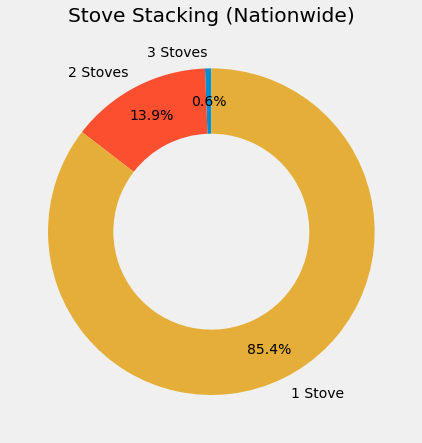

In [34]:
#Ploting
cookstoves_stack['% Households'].plot.pie(wedgeprops= {'width' :0.4}, startangle=90, figsize = (7,7),
                                          autopct = lambda p: f'{p:.1f}%', pctdistance=0.8);
plt.title('Stove Stacking (Nationwide)');
plt.ylabel('');

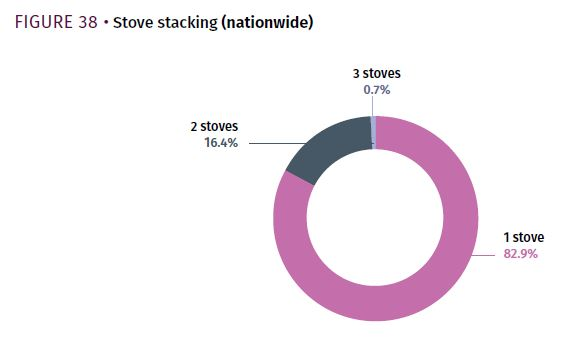

In [35]:
Image('references/Stove stacking nationwide.JPG')

> The values for 1 stove and for 2 stoves don't match those reported.

#### Stack Combinations

Most households that stack use an LPG stove along with a biomass stove. More households using LPG stoves with a biomass stove consider the biomass stove as the primary stove and use the biomass stove for longer periods of time compared to the LPG stove.

The question asking whether the stove is primary or not is J34

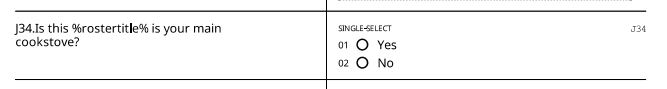

In [36]:
Image('references/Main Stove Question J34.JPG')

In [37]:
#Combining the Stove with Status (Main/Not Main)
cookstoves['Type_Status'] = cookstoves['Type'] + '_' + cookstoves['J34'].astype(str)

In [38]:
# The stoves combinations
households_stoves = cookstoves[['HHID','Type_Status']].groupby('HHID')

In [39]:
# Combining all stoves used by a household in a list
households_stoves = households_stoves.apply(lambda group: list(group['Type_Status']))
households_stoves = households_stoves.to_frame(name='Types_Status').reset_index()
households_stoves.head()

,HHID,Types_Status
0,110148801,[Improved stove_1]
1,110148802,"[3-Stone/Open fire stove_1, Improved stove_1]"
2,110148803,[Traditional stove_1]
3,110148804,[3-Stone/Open fire stove_1]
4,110148805,[3-Stone/Open fire stove_1]


In [40]:
#Extracting only households with stacking
stacking_households = households_stoves[households_stoves['Types_Status'].apply(lambda x: len(x) >1)]
stacking_households['Types_Status'] = stacking_households['Types_Status'].apply(lambda x: sorted(x))
stacking_households

,HHID,Types_Status
1,110148802,"[3-Stone/Open fire stove_1, Improved stove_1]"
20,110148906,"[3-Stone/Open fire stove_1, Improved stove_1]"
22,110148908,"[3-Stone/Open fire stove_1, Improved stove_1]"
26,110148912,"[3-Stone/Open fire stove_1, Improved stove_1]"
30,110149001,"[3-Stone/Open fire stove_2, Traditional stove_1]"
...,...,...
5918,432713509,"[Electric/Induction/rice cooker_1, LPG/Natural..."
5924,432713515,"[Electric/Induction/rice cooker_1, LPG/Natural..."
5930,432713606,"[Electric/Induction/rice cooker_1, LPG/Natural..."
5933,432713609,"[Electric/Induction/rice cooker_1, LPG/Natural..."


In [41]:
#Summarizing the type & status
def summarize_type_status(type_status):
    types_status_mapping = {'LPG/Natural gas stove_2 Traditional stove_1' : 'Traditional(Main) & LPG',
                            'LPG/Natural gas stove_1 Traditional stove_1' : 'Traditional(Main) & LPG(Main)',
                            '3-Stone/Open fire stove_1 LPG/Natural gas stove_1' : 'Open fire(Main) & LPG(Main)',
                            'LPG/Natural gas stove_1 Traditional stove_2' : 'Traditional & LPG(Main)',
                            '3-Stone/Open fire stove_2 LPG/Natural gas stove_1' : 'Open fire & LPG(Main)', 
                            '3-Stone/Open fire stove_1 Traditional stove_1' : 'Open fire(Main) & Traditional(Main)',
                            'Improved stove_1 LPG/Natural gas stove_2' : 'Improved(Main) & LPG',
                            'Electric/Induction/rice cooker_2 LPG/Natural gas stove_1 ' : 'Electric & LPG(Main)',
                            '3-Stone/Open fire stove_1 LPG/Natural gas stove_2' : 'Open fire(Main) & LPG',
                            'Electric/Induction/rice cooker_1 LPG/Natural gas stove_1' : 'Electric(Main) & LPG(Main)',
                            '3-Stone/Open fire stove_1 Improved stove_1': 'Open fire(Main) & Improved(Main)',
                            '3-Stone/Open fire stove_1 Biogas stove_1': 'Open fire(Main) & Biogas(Main)'}
    
    if type_status in types_status_mapping.keys():
        return types_status_mapping[type_status]
    else:
        return 'Others'

stacking_households['Summary'] = stacking_households['Types_Status'].str.join(' ').apply(lambda x: summarize_type_status(x))
summary_stacks = stacking_households['Summary'].value_counts(normalize = True)*100

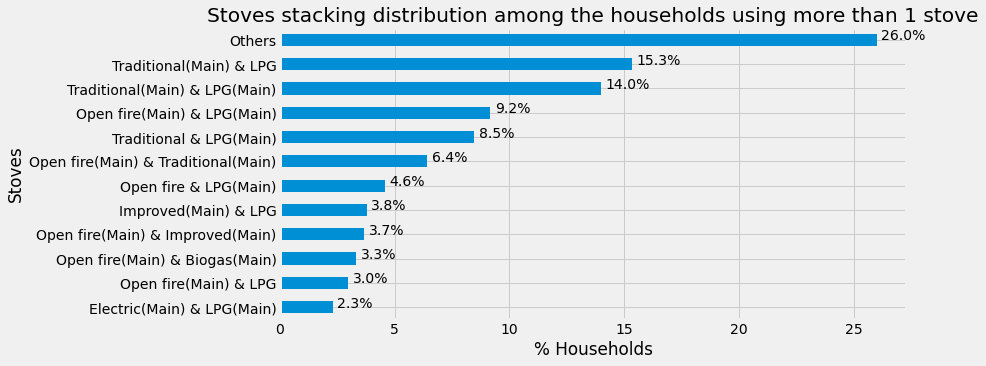

In [42]:
summary_stacks.sort_values().plot(kind='barh', figsize = (10,5));
plt.title('Stoves stacking distribution among the households using more than 1 stove');

for i, value in enumerate(sorted(summary_stacks.values)):
    plt.text(value+0.2,i, f'{value:.1f}%');
    
plt.xlabel('% Households');
plt.ylabel('Stoves');

### Modern Energy Cooking Services Attributes

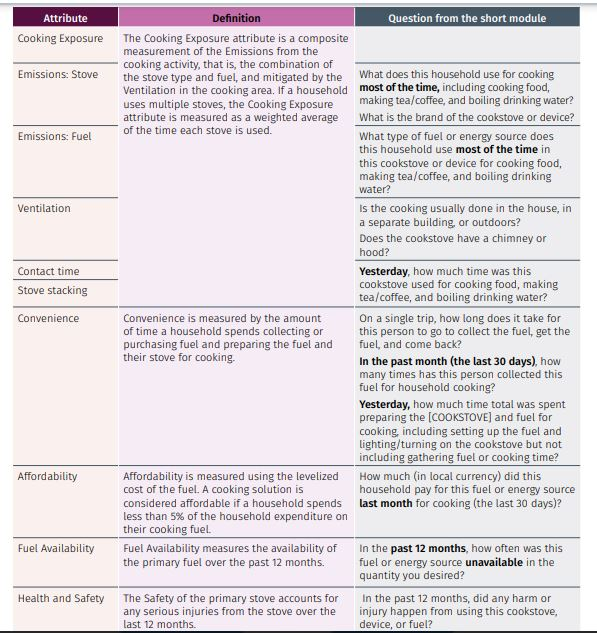

In [43]:
Image('references/Definitions and questions for energy cooking services attributes calculations.JPG')

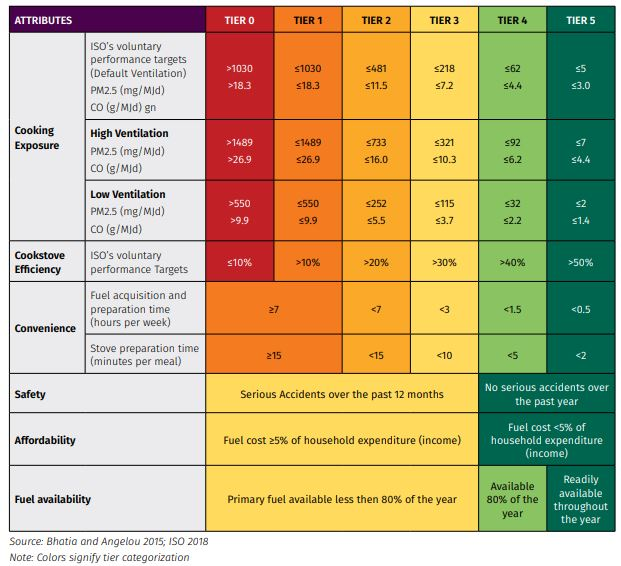

In [44]:
Image('references/Energy cooking services tiers.JPG')

#### Cooking exposure

The Cooking Exposure attribute is a proxy indicator to measure the health impacts of cooking activity on
the primary cook. It is calculated by, first, determining the level of emissions based on a combination
of fuels and stove technologies reported in the data. Then the Ventilation factor is measured based
on the structure of the household’s cooking space.

In this report ventilation is defined as using a chimney, hood, or other exhaust system while using a stove or having doors or windows in the cooking area. We do not include the data on volume of the cooking area as there are a large share of missing values.


##### Emissions

In [276]:
##Question J18 asks about chimney, hood/exhaust
##Time spend on cookstove is in column J24 to J29
##Fuel used on a cookstove is in J20_A
##Coostove Type in the Id column was mapped in section 1.2.2 to match the name.

In [229]:
stove_fuel = cookstoves[['HHID','Type','J18','J20_A','J24','J25','J26','J27','J28','J29']]

In [230]:
#Calculating the total time spent on each stove in a week
stove_fuel['Stove Time'] = stove_fuel['J24']*(stove_fuel.loc[:,'J25':'J29'].sum(axis=1))

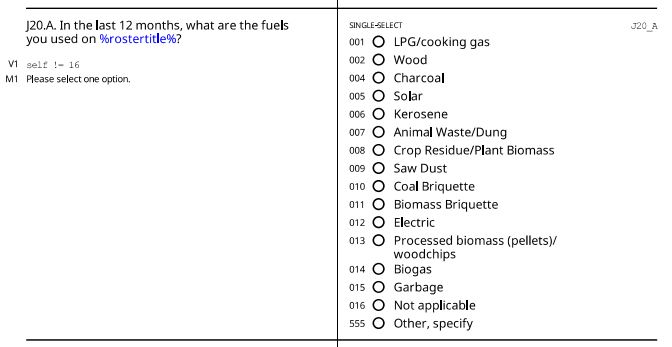

In [105]:
#Mapping fuel types
Image('references/fuel type on a particular cookstove.JPG')

In [231]:
fuels_mapping = {1:'LPG/Cooking gas', 2:'Wood', 4:'Charcoal', 5:'Solar', 6:'Kerosene',
                 7:'Animal Waste/Dung', 8:'Crop Residue/Plant Biomas', 9:'Saw Dust',
                 10:'Coal Briquette', 11:'Biomas Briquette', 12:'Electric',
                 13:'Processed biomas (pellets)/woodchips', 14:'Biogas', 15:'Garbage'}

stove_fuel['Fuel Type'] = stove_fuel['J20_A'].replace(fuels_mapping)
stove_fuel['Ventilation'] = stove_fuel['J18'].replace({1:'Yes', 2:'No'})
stove_fuel.rename(columns={'Type':'Stove Type'}, inplace = True)
stove_fuel.head()

,HHID,Stove Type,J18,J20_A,J24,J25,J26,J27,J28,J29,Stove Time,Fuel Type,Ventilation
0,110148801,Improved stove,1.0,2,4,60,40,80,20,60,1040,Wood,Yes
1,110148802,3-Stone/Open fire stove,2.0,2,4,60,60,60,0,60,960,Wood,No
2,110148802,Improved stove,1.0,2,3,60,60,60,0,0,540,Wood,Yes
3,110148803,Traditional stove,2.0,2,3,60,40,60,20,35,645,Wood,No
4,110148804,3-Stone/Open fire stove,2.0,2,3,90,120,60,0,60,990,Wood,No


In [232]:
stove_fuel_tiers = stove_fuel[['HHID','Stove Type', 'Fuel Type', 'Ventilation','Stove Time']]

> Using the approach used for this section in Rwanda

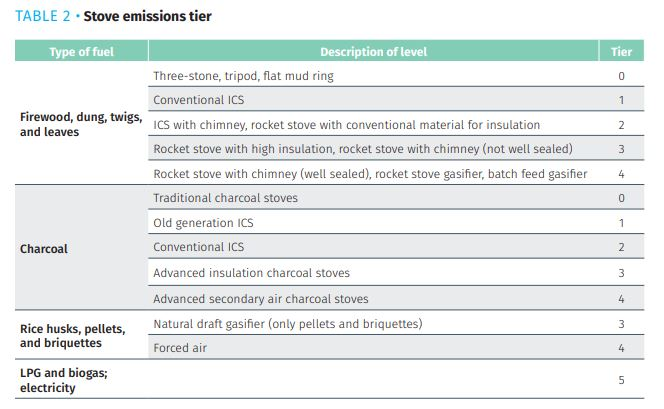

In [124]:
Image("references/rwanda's stove emissions tier.JPG")

In [249]:
def stove_tier(row):
    stove_type = row['Stove Type']
    fuel_type = row['Fuel Type']
    ventilation = str(row['Ventilation'])
    
    clean_fuels = ['LPG/Cooking gas', 'Biogas', 'Electric', 'Solar', 'Kerosene']
    clean_stoves = ['Biogas stove','Electric/Induction/rice cooker', 'Solar Cooker', 'LPG/Natural gas stove']
    unclean_fuels = ['Wood','Animal Waste/Dung','Crop Residue/Plant Biomas', 'Saw Dust', 'Garbage']
    pellets_briquettes = ['Processed biomas (pellets)/woodchips', 'Biomas Briquette', 'Coal Briquette']
    
    if fuel_type in clean_fuels or stove_type in clean_stoves:
        return 5
    
    elif stove_type == '3-Stone/Open fire stove' and fuel_type in unclean_fuels:
        return 0
    
    elif stove_type == 'Traditional stove' and (fuel_type in unclean_fuels or fuel_type == 'Charcoal'):
        return 0
    
    elif stove_type == 'Improved stove':
        if (fuel_type in unclean_fuels) and (ventilation == 'No' or ventilation == 'nan'):
            return 0
        elif (fuel_type in unclean_fuels) and (ventilation == 'Yes'):
            return 1
        elif (fuel_type == 'Charcoal' or fuel_type in pellets_briquettes) and (ventilation == 'No' or ventilation == 'nan'):
            return 2
        elif (fuel_type == 'Charcoal' or fuel_type in pellets_briquettes) and (ventilation == 'Yes'):
            return 3
    
    elif fuel_type in pellets_briquettes:
        return 3
    
    else:
        return 'Unkown'

In [250]:
stove_fuel_tiers['Stove Tier'] = stove_fuel_tiers.apply(lambda row: stove_tier(row), axis = 1)
stove_fuel_tiers['Stove Tier'].value_counts()

0    3862
5    2548
1     491
2       8
3       1
Name: Stove Tier, dtype: int64

In [269]:
def weighted_average_tier(group):
    weights = group['Stove Time']
    values = group['Stove Tier']
    
    if sum(weights) > 0:
        average_tier = np.average(values, weights = weights)
        return round(average_tier)
    else:
        if len(values) > 1:
            return max(values)
        else:
            return list(values)[0]

In [270]:
hh_stove_tiers = stove_fuel_tiers.groupby('HHID').apply(lambda group: weighted_average_tier(group)).to_frame()
hh_stove_tiers.rename(columns={0:'HH Stove Tier'}, inplace = True)

In [271]:
hh_stove_tiers['HH Stove Tier'].value_counts()

0    3213
5    1896
1     584
2     138
4      85
3      84
Name: HH Stove Tier, dtype: int64

##### Ventilation

In the case of Rwanda the second step was to determine the ventilation for the cooking area, categorized by the location of the
cooking activity. 

- A household that prepares its meals indoors in an area with fewer than two openings (windows and doors) to the outside is classified as having poor ventilation. 
- A household that prepares its meals indoors in an area with two or more openings is classified as having average ventilation.
- And a household that cooks its meals outdoors is classified as having good ventilation. 

In [277]:
#Question J44 asks how many windows/doors opening to the outside the cooking space has

In [280]:
ventilation = main_dataset[['HHID','J44']]

In [281]:
ventilation.head()

,HHID,J44
0,110148801,4.0
1,110148802,2.0
2,110148803,2.0
3,110148804,3.0
4,110148805,2.0


In [274]:
# TO COMPLETE

##### Final Cooking Exposure Tier

- Households in Tier 0 for emissions remain in Tier 0 for Cooking Exposure if they have poor or average ventilation but move to Tier 1 if they have good ventilation. 
- Households in Tiers 1–3 for emissions (using a traditional cookstove or ICS) move down one tier for Cooking Exposure if they have bad ventilation, remain in the same tier if they have average ventilation, and move up one tier if they have good ventilation. 
- Households in Tier 4 for emissions remain in Tier 4 for Cooking Exposure if they have poor or average ventilation and move to Tier 5 if they have good ventilation. 
- Households in Tier 5 for emissions remain in Tier 5 regardless of ventilation. 

In [275]:
# TO COMPLETE

#### Cookstove Efficiency

In Nepal, the government’s Alternative Energy Promotion Centre published the 2016 NIBC report that
outlines the standards and protocols for testing stoves and recognizing and certifying the stoves that
meet the standards. The stoves are tested for emissions levels of PM2.5 and carbon monoxide as well
as thermal efficiency. There are two established national laboratories in Nepal that undertake stove
testing: the Centre for Rural Technology, Nepal and RETS (RETS 2018). The survey did not measure stove
efficiency directly. Households that were interviewed in the survey were able to provide information
that could help identify all the models and makes of the improved biomass stoves in use. Of the stoves
identified through the survey, not all had testing data available with which to assess their efficiency
level. To consistently apply the Efficiency attribute across the sample, it would require information
on the efficiency level of each stove a household uses, particularly for the solid biomass improved
cookstoves. 

Without this detailed data, even though the survey asked in question J10 the manufacturer and the model of the cookstove, this report presents a version of the MTF that does not include the Efficiency attribute but calculates the aggregate tier for access to modern energy cooking services with the other five attributes.

#### Convenience (Time needed for cooking)

The attribute on Convenience is composed of the amount of time a household spends acquiring and
preparing the fuel each week and the amount of time a household spends preparing a stove before
each meal.

The questions related to time spent acquiring, preparing the fuel/enery source and the cook stove are in question J22, R2.A and R10.A respectively.

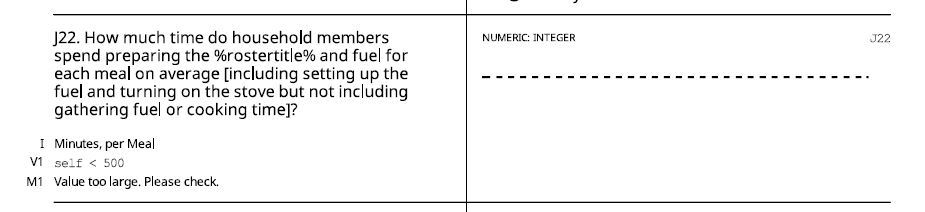

In [46]:
Image('references/time needed for cooking.JPG')

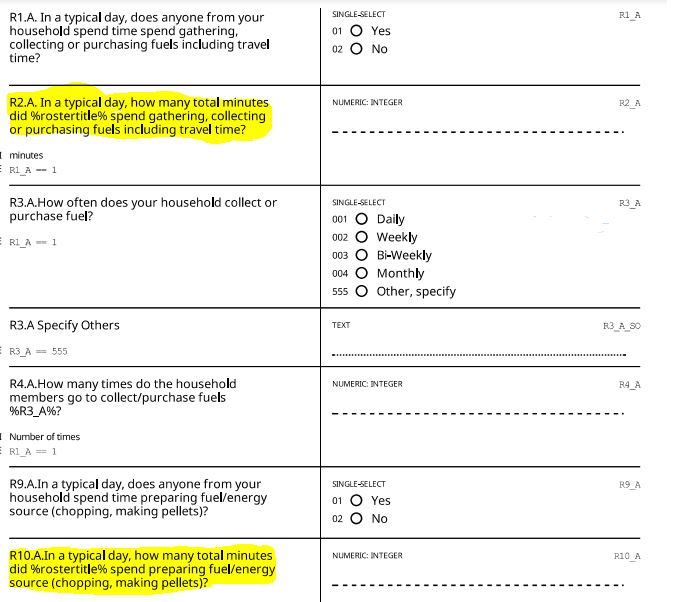

In [47]:
Image('references/Time spent acquiring and preparing fuel or energy source.JPG')

In [48]:
#Time spent preparing the stove
stove_time = cookstoves[['HHID','J22']].groupby('HHID', as_index=False).sum()
stove_time.rename(columns = {'J22':'Time spent on stove'}, inplace = True)
stove_time.head()

,HHID,Time spent on stove
0,110148801,20
1,110148802,20
2,110148803,25
3,110148804,10
4,110148805,10


In [49]:
# Fuel acquisition and preparation time
r_section = pd.read_csv('raw_data/csv/R_time_use.csv')
#Extracting only households with respondends who spend time aquiring or preparing fuel
fuel_acquisation = r_section[(r_section['R1_A'] == 'Yes') | (r_section['R9_A'] == 'Yes')]
fuel_acquisation.head()

,HHID,Id,R1_A,R2_A,R3_A,R3_A_SO,R4_A,R9_A,R10_A,R11_A,...,R19_A,R20_A,R21_A,R22_A,R23_A,R24_A,R25_A,R26_A,R27_A,R28_A
0,110148801,Women (Age 15 yrs and older),Yes,120.0,Monthly,,1.0,Yes,20.0,Yes,...,No,NaN,No,NaN,No,NaN,No,NaN,Yes,120.0
1,110148801,Men(Age 15 yrs and older,Yes,120.0,Monthly,,2.0,Yes,30.0,No,...,No,NaN,No,NaN,Yes,600.0,No,NaN,Yes,180.0
2,110148802,Women (Age 15 yrs and older),Yes,60.0,Daily,,2.0,No,NaN,Yes,...,Yes,180.0,Yes,30.0,No,NaN,Yes,240.0,Yes,120.0
6,110148803,Men(Age 15 yrs and older,Yes,200.0,Monthly,,1.0,Yes,30.0,No,...,No,NaN,No,NaN,Yes,300.0,No,NaN,Yes,120.0
7,110148803,Women (Age 15 yrs and older),Yes,120.0,Monthly,,1.0,No,NaN,Yes,...,No,NaN,Yes,120.0,No,NaN,No,NaN,No,NaN


In [50]:
#Summing up the time spent on fuel on a respondent level
fuel_acquisation = fuel_acquisation[['HHID','R2_A','R10_A']]
fuel_acquisation.fillna(0, inplace = True)
fuel_acquisation['Time spent on fuel'] = (fuel_acquisation['R2_A'] + fuel_acquisation['R10_A'])/60 #convert to hours

In [51]:
#Summing up the time spend on fuel on a household level
fuel_time = fuel_acquisation[['HHID', 'Time spent on fuel']].groupby('HHID', as_index = False).sum()
fuel_time.head()

,HHID,Time spent on fuel
0,110148801,4.833333
1,110148802,1.000000
2,110148803,5.833333
3,110148804,2.000000
4,110148805,2.000000


In [52]:
#Combining the time spent on stove and the time spent on fuel
convenience = pd.merge(stove_time, fuel_time, how = 'outer', on = 'HHID')
convenience.fillna(0, inplace = True)
convenience.head()

,HHID,Time spent on stove,Time spent on fuel
0,110148801,20,4.833333
1,110148802,20,1.000000
2,110148803,25,5.833333
3,110148804,10,2.000000
4,110148805,10,2.000000


In [53]:
def find_tier(household_row):
    """
    Returns the tier of a household after comparing the time used for preparing stove and the 
    time use for acquiring and preparing fuel according to Annex 4 on the page 75 of the report.
    """
    stove_time = household_row['Time spent on stove']
    fuel_time = household_row['Time spent on fuel']
    
    if stove_time >= 15 or fuel_time >= 7:
        return 'Tier 1'
    
    elif (stove_time < 15 and stove_time >=10) or (fuel_time < 7 and fuel_time >= 3):
        return 'Tier 2'
    
    elif (stove_time < 10 and stove_time >=5) or (fuel_time < 3 and fuel_time >= 1.5):
        return 'Tier 3'
    
    elif (stove_time < 5 and stove_time >=2)  or (fuel_time < 1.5 and fuel_time >= 0.5):
        return 'Tier 4'
    
    elif stove_time < 2 and fuel_time < 0.5:
        return 'Tier 5'
    
    else:
        return 'Unknown'

In [54]:
convenience['Tier'] = convenience.apply(find_tier, axis=1)

In [55]:
convenience

,HHID,Time spent on stove,Time spent on fuel,Tier
0,110148801,20,4.833333,Tier 1
1,110148802,20,1.000000,Tier 1
2,110148803,25,5.833333,Tier 1
3,110148804,10,2.000000,Tier 2
4,110148805,10,2.000000,Tier 2
...,...,...,...,...
5995,432714011,0,0.000000,Tier 5
5996,432714012,0,0.000000,Tier 5
5997,432714013,0,0.000000,Tier 5
5998,432714014,0,0.000000,Tier 5


In [56]:
#Adding locality
localities = main_dataset[['HHID','LOCALITY']]
localities['LOCALITY'] = localities['LOCALITY'].replace(locality_mappings)
convenience_locality = pd.merge(convenience, localities, how = 'left', on = 'HHID')

In [57]:
#Convenience Nationwide
convenience_nationwide = convenience['Tier'].value_counts(normalize=True)*100
convenience_nationwide = convenience_nationwide.to_frame().rename(columns={'Tier':'Nationwide'})
convenience_nationwide.sort_index()

,Nationwide
Tier 1,34.133333
Tier 2,25.466667
Tier 3,13.266667
Tier 4,6.916667
Tier 5,20.216667


In [58]:
#Convenience Urban
convenience_urban = convenience_locality[convenience_locality['LOCALITY']=='Urban']['Tier'].value_counts(normalize=True)*100
convenience_urban = convenience_urban.to_frame().rename(columns={'Tier':'Urban'})
convenience_urban.sort_index()

,Urban
Tier 1,26.179604
Tier 2,19.299848
Tier 3,13.911720
Tier 4,9.375951
Tier 5,31.232877


In [59]:
#Convenience Rural
convenience_rural = convenience_locality[convenience_locality['LOCALITY']=='Rural']['Tier'].value_counts(normalize=True)*100
convenience_rural = convenience_rural.to_frame().rename(columns={'Tier':'Rural'})
convenience_rural.sort_index()

,Rural
Tier 1,43.756906
Tier 2,32.928177
Tier 3,12.486188
Tier 4,3.941068
Tier 5,6.887661


In [60]:
#Convenience nationwide, rural and urban
convenience_all = pd.concat([convenience_rural, convenience_urban, convenience_nationwide], axis = 1)
convenience_all

,Rural,Urban,Nationwide
Tier 1,43.756906,26.179604,34.133333
Tier 2,32.928177,19.299848,25.466667
Tier 3,12.486188,13.911720,13.266667
Tier 5,6.887661,31.232877,20.216667
Tier 4,3.941068,9.375951,6.916667


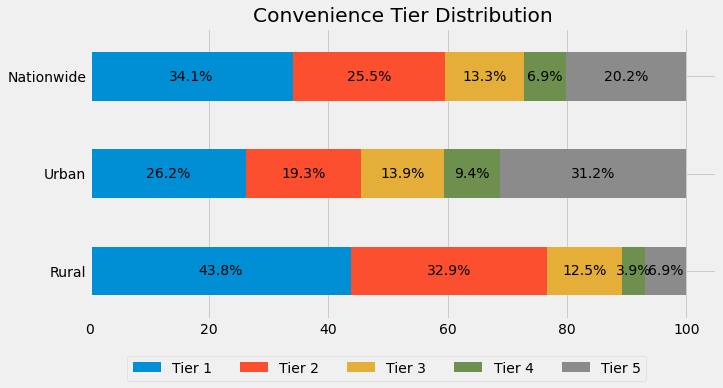

In [61]:
#Ploting
plot = convenience_all.sort_index().T.plot(kind='barh', stacked=True, figsize = (10,5))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 2
    y_label = y_bar + bar_height / 2
    plt.text(x_label, y_label, label, va = 'center', ha = 'center')
    
plt.title('Convenience Tier Distribution')
plt.legend(bbox_to_anchor=(0.9,- 0.1), ncol = 5);

> Across the country, a majority of the households are in Tiers 1 and 2 for Convenience. This
pattern is true for both rural and urban areas, although urban areas have a greater share of households
in Tier 5.

> The results reflect the large percentage of urban households that use a clean-fuel stove as their
primary stove (which requires much less time to acquire and prepare fuels for use and to prepare the
stove for cooking). Also, urban households are more likely to purchase fuel, while rural households
are more likely to gather firewood, which is time consuming.

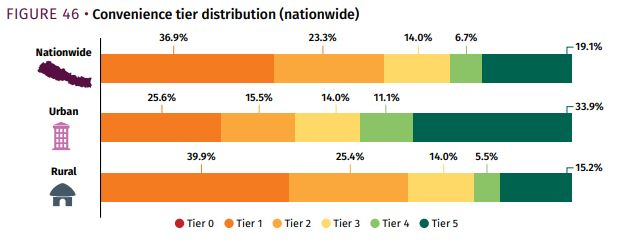

In [62]:
Image('references/convenience tier distribution.JPG')

> Values on Tier 5 and T2 in the report are very high compared to what seen from the dataset.

#### Health and Safety

This attribute is assessed based on the safety of the primary stove accounts for any serious injuries from the stove over the last 12 months.

Question : *In the past 12 months, did any harm or injury happen from using this cookstove, device, or fuel?*

The above question is close to the question in J33

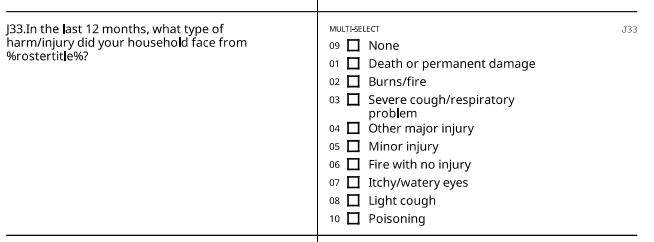

In [63]:
Image('references/J33 types of injury faced from cookstove.JPG')

In [64]:
#Extracting answers related to J33
injury_types = [column for column in cookstoves.columns if column.startswith('J33_')]
injury_types.insert(0,'HHID')
injury_types.insert(1,'J34') #The mainstove specifier
safety = cookstoves[injury_types]
injury_types_mappings = {'J33__9':'None','J33__1':'Death/Permanent damage', 'J33__2':'Burns/fire',
                          'J33__3':'Severe Cough/Respiratory problem', 'J33__4':'Other major injury',
                         'J33__5':'Minor injury', 'J33__6':'Fire with no injury', 'J33__7':'Itchy/watery eyes',
                          'J33__8' : 'Light cough', 'J33__10':'Poisoning'}
safety = safety[safety['J34'] == 1] #Only main stoves
safety.rename(columns=injury_types_mappings, inplace = True)
safety.drop('J34', axis = 1, inplace = True)

In [65]:
safety['Minor'] = safety['None'] | safety['Minor injury'] | safety['Fire with no injury'] | safety['Itchy/watery eyes'] | safety['Light cough'] | safety['Poisoning'] 

In [66]:
#Nationwide
safety = safety.groupby('HHID').max()
safety_nationwide = (safety['Minor'].value_counts(normalize=True)*100).to_frame()
safety_nationwide.columns = ['Nationwide']
safety_nationwide.head()

,Nationwide
1,99.666667
0,0.333333


In [67]:
safety_locality = pd.merge(safety, localities, how = 'left', on = 'HHID')
#Rural
safety_rural = safety_locality[safety_locality['LOCALITY'] == 'Rural']
safety_rural = (safety_rural['Minor'].value_counts(normalize=True)*100).to_frame()
safety_rural.columns = ['Rural']
safety_rural

,Rural
1,99.484346
0,0.515654


In [68]:
safety_urban = safety_locality[safety_locality['LOCALITY'] == 'Urban']
safety_urban = (safety_urban['Minor'].value_counts(normalize=True)*100).to_frame()
safety_urban.columns = ['Urban']
safety_urban

,Urban
1,99.817352
0,0.182648


In [69]:
#Safety nationwide, rural and urban
safety_all = pd.concat([safety_rural, safety_urban, safety_nationwide], axis = 1)
safety_all.rename(index = {1:'Tier 5 (No major injury)', 0:'Tier 3 (Major injury over the last year)'}, inplace =True)
safety_all

,Rural,Urban,Nationwide
Tier 5 (No major injury),99.484346,99.817352,99.666667
Tier 3 (Major injury over the last year),0.515654,0.182648,0.333333


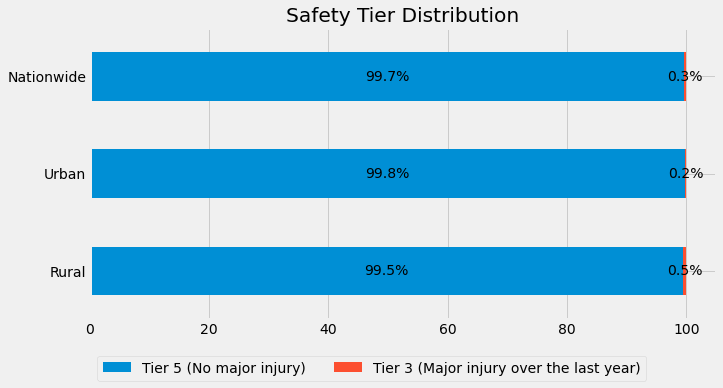

In [70]:
plot = safety_all.T.plot(kind='barh', stacked=True, figsize = (10,5))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 2
    y_label = y_bar + bar_height / 2
    plt.text(x_label, y_label, label, va = 'center', ha = 'center')
    
plt.title('Safety Tier Distribution')
plt.legend(bbox_to_anchor=(0.9,- 0.1), ncol = 5);

> Most households did not recall a major injury while using the stove
over the past year.

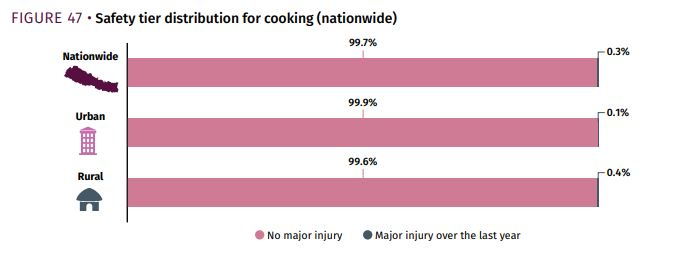

In [71]:
Image('references/safety tier distribution reports.JPG')

#### Fuel Availability

Fuel Availability measures the availability of the primary fuel over the past 12 months.

Question: *In the past 12 months, how often was this fuel or energy source unavailable in the quantity you desired?*

This question is found in Question J21 of the questionnaire

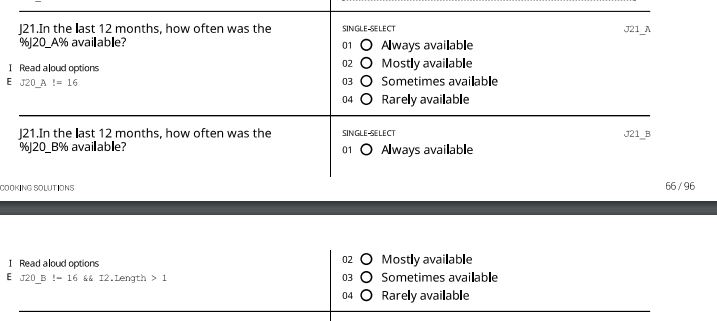

In [72]:
 Image('references/J21 fuel availability question.JPG')

In [73]:
#Extracting the response related to the most used fuel
fuel_availability = cookstoves[['HHID','J21_A']]

In [74]:
fuel_nationwide = fuel_availability['J21_A'].value_counts(normalize = True).to_frame()*100
fuel_nationwide.columns = ['Nationwide']
fuel_nationwide.head()

,Nationwide
1,89.189580
2,9.551375
3,0.694645
4,0.564399


In [75]:
fuel_locality = pd.merge(fuel_availability, localities, how = 'left', on = 'HHID')
#Rural
fuel_rural = fuel_locality[fuel_locality['LOCALITY'] == 'Rural']
fuel_rural = (fuel_rural['J21_A'].value_counts(normalize=True)*100).to_frame()
fuel_rural.columns = ['Rural']
fuel_rural

,Rural
1,90.035358
2,8.871745
3,0.675024
4,0.417872


In [76]:
#Urban
fuel_urban = fuel_locality[fuel_locality['LOCALITY'] == 'Urban']
fuel_urban = (fuel_urban['J21_A'].value_counts(normalize=True)*100).to_frame()
fuel_urban.columns = ['Urban']
fuel_urban

,Urban
1,88.496973
2,10.107923
3,0.710713
4,0.684391


In [77]:
#Safety nationwide, rural and urban
fuel_all = pd.concat([fuel_rural, fuel_urban, fuel_nationwide], axis = 1)
availability_mapping = {1:'Tier 5 (Always Available)', 2:'Tier 4 (Mostly Available)',
                       3: 'Tier 3 (Sometimes/Rarely available)', 4:'Tier 3 (Sometimes/Rarely available)'}
fuel_all.rename(index = availability_mapping, inplace =True)
fuel_all = fuel_all.reset_index().groupby('index').sum() #Grouping Sometimes & Rarely

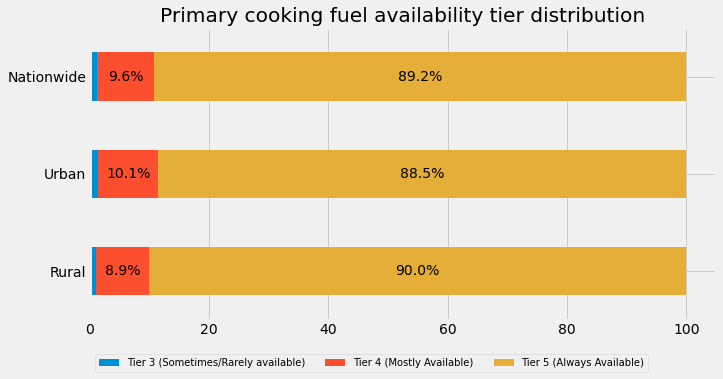

In [78]:
plot = fuel_all.T.plot(kind='barh', stacked=True, figsize = (10,5))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 2
    y_label = y_bar + bar_height / 2
    if bar_width > 3:
        plt.text(x_label, y_label, label, va = 'center', ha = 'center')
    
plt.title('Primary cooking fuel availability tier distribution')
plt.legend(bbox_to_anchor=(0.9,- 0.1), ncol = 5, fontsize = 10);

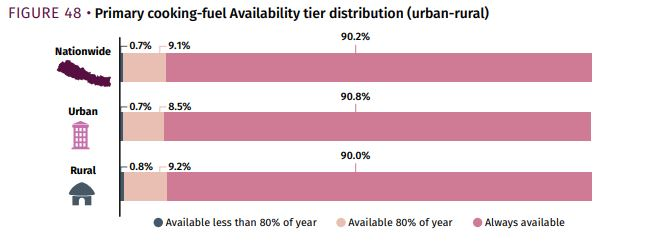

In [79]:
Image('references/fuel availability report.JPG')

#### Affordability

The Affordability attribute is formulated by comparing the share of the annual expenditure on cooking fuel to the total annual household expenditure. A cooking solution is considered affordable if a household spends less than 5% of the household expenditure on their cooking fuel.

Question: *How much (in local currency) did this household pay for this fuel or energy source last month for cooking (the last 30 days)?*

Question close to the above one is J37_A and J37_B

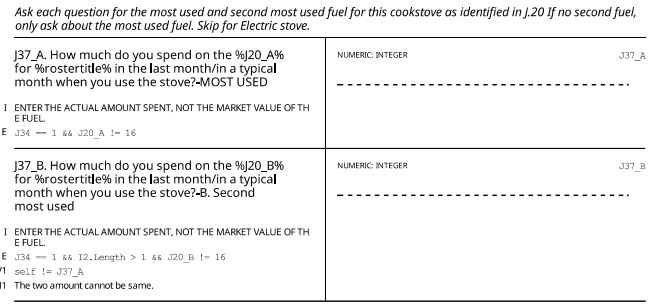

In [80]:
Image('references/expenditure on cooking question.JPG')

In [81]:
#Extracting cooking expenditures
cooking_expenses = cookstoves[['HHID','J37_A', 'J37_B']]
cooking_expenses.fillna(0, inplace = True)

In [82]:
cooking_expenses = cooking_expenses.groupby('HHID').sum() #grouping expenses of each households on fuels
cooking_expenses['Cooking expenditures'] = cooking_expenses.sum(axis=1)

In [83]:
cooking_expenses

,J37_A,J37_B,Cooking expenditures
HHID,,,
110148801,0.0,0.0,0.0
110148802,0.0,0.0,0.0
110148803,300.0,0.0,300.0
110148804,0.0,0.0,0.0
110148805,0.0,0.0,0.0
...,...,...,...
432714011,1375.0,0.0,1375.0
432714012,895.0,0.0,895.0
432714013,1375.0,0.0,1375.0


In [84]:
#Consumption data  for weekly items are in M section
#weekly_items = pd.read_stata('raw_data/dta/M_consumption.dta')
weekly_items = pd.read_csv('raw_data/csv/M_consumption.csv')
weekly_items

,Unnamed: 0,HHID,Id,M_A,M_B,M_C
0,0,110148801,"M5. Vegetables (e.g.: okra, tomato, onion, car...",0.0,500.0,0.0
1,1,110148801,"M8. Other food items (e,g, pepper, salt, spice...",150.0,0.0,0.0
2,2,110148801,M7. Sugar,100.0,0.0,0.0
3,3,110148801,"M3. Milk & milk products (e.g.: powder, tinned...",0.0,400.0,0.0
4,4,110148801,"M4.Edible oil (e.g.: mustard oil, soya bean oi...",200.0,0.0,0.0
...,...,...,...,...,...,...
49237,49237,432714015,"M10. Beverages (e.g.: malt drinks, minerals, c...",280.0,0.0,0.0
49238,49238,432714015,M1. Cereals & cereal products and starchy staples,595.0,0.0,0.0
49239,49239,432714015,"M6. Egg, & poultry",380.0,0.0,0.0
49240,49240,432714015,"M11. Alcohol, tobacco and cigarettes",560.0,0.0,0.0


In [85]:
weekly_expenses = weekly_items[['HHID','M_A','M_B','M_C']].groupby('HHID').sum()
weekly_expenses['Weekly expenditures'] = weekly_expenses.sum(axis=1)
weekly_expenses.head()

,M_A,M_B,M_C,Weekly expenditures
HHID,,,,
110148801,550.0,2100.0,0.0,2650.0
110148802,1620.0,850.0,0.0,2470.0
110148803,1250.0,1200.0,0.0,2450.0
110148804,1420.0,1075.0,0.0,2495.0
110148805,1570.0,660.0,0.0,2230.0


In [86]:
#The typical monthly expenses are in columns M12 to M19 in the maindataset
monthly_expenses = main_dataset[['HHID','M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19']]
monthly_expenses.replace({-888:0}, inplace = True) # replacing DON'T KNOW (-888) with 0
monthly_expenses.fillna(0, inplace = True)
monthly_expenses.set_index('HHID', inplace = True)
monthly_expenses['Monthly expenditures'] = monthly_expenses.sum(axis=1)
monthly_expenses.head()

,M12,M13,M14,M15,M16,M17,M18,M19,Monthly expenditures
HHID,,,,,,,,,
110148801,1500.0,500,0,400,350,0,0,0.0,2750.0
110148802,0.0,250,0,500,0,0,500,0.0,1250.0
110148803,0.0,600,0,200,0,0,0,1000.0,1800.0
110148804,2500.0,300,0,300,0,0,0,0.0,3100.0
110148805,0.0,300,0,200,0,0,0,0.0,500.0


In [87]:
#The typical yearly expenses are in columns M20 to M33 in the maindataset
#main_dataset.loc[:,'M20':'M33'].columns
yearly_expenses = main_dataset[['HHID','M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27'
                                 , 'M28', 'M29','M30', 'M31', 'M32', 'M33']]
yearly_expenses.replace({-888:0}, inplace = True) # replacing DON'T KNOW (-888) with 0
yearly_expenses.fillna(0, inplace = True)
yearly_expenses.set_index('HHID', inplace = True)
yearly_expenses['Yearly expenditures'] = yearly_expenses.sum(axis=1)
yearly_expenses.head()

,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,Yearly expenditures
HHID,,,,,,,,,,,,,,,
110148801,0.0,15000.0,20000.0,0.0,30000.0,20000.0,0.0,0,0.0,0.0,0.0,0.0,8000.0,5000.0,98000.0
110148802,20000.0,15000.0,35000.0,0.0,700.0,0.0,0.0,1800,0.0,0.0,0.0,0.0,0.0,0.0,72500.0
110148803,15000.0,20000.0,15000.0,150.0,15000.0,0.0,0.0,0,0.0,0.0,0.0,0.0,15000.0,10000.0,90150.0
110148804,0.0,20000.0,35000.0,0.0,500.0,1200.0,0.0,0,0.0,0.0,0.0,15000.0,0.0,0.0,71700.0
110148805,10000.0,15000.0,25000.0,0.0,1000.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,51000.0


In [88]:
all_expenses = pd.concat([cooking_expenses, weekly_expenses, monthly_expenses, yearly_expenses], axis = 1)
all_expenses

,J37_A,J37_B,Cooking expenditures,M_A,M_B,M_C,Weekly expenditures,M12,M13,M14,...,M25,M26,M27,M28,M29,M30,M31,M32,M33,Yearly expenditures
HHID,,,,,,,,,,,,,,,,,,,,,
110148801,0.0,0.0,0.0,550.0,2100.0,0.0,2650.0,1500.0,500,0,...,20000.0,0.0,0,0.0,0.0,0.0,0.0,8000.0,5000.0,98000.0
110148802,0.0,0.0,0.0,1620.0,850.0,0.0,2470.0,0.0,250,0,...,0.0,0.0,1800,0.0,0.0,0.0,0.0,0.0,0.0,72500.0
110148803,300.0,0.0,300.0,1250.0,1200.0,0.0,2450.0,0.0,600,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,15000.0,10000.0,90150.0
110148804,0.0,0.0,0.0,1420.0,1075.0,0.0,2495.0,2500.0,300,0,...,1200.0,0.0,0,0.0,0.0,0.0,15000.0,0.0,0.0,71700.0
110148805,0.0,0.0,0.0,1570.0,660.0,0.0,2230.0,0.0,300,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,51000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432714011,1375.0,0.0,1375.0,2105.0,1030.0,0.0,3135.0,460.0,650,360,...,0.0,0.0,0,0.0,650.0,12000.0,0.0,0.0,0.0,102650.0
432714012,895.0,0.0,895.0,2365.0,1695.0,0.0,4060.0,0.0,650,250,...,0.0,0.0,0,0.0,550.0,12000.0,0.0,0.0,0.0,302550.0
432714013,1375.0,0.0,1375.0,3730.0,100.0,0.0,3830.0,0.0,450,250,...,0.0,0.0,0,0.0,450.0,15000.0,0.0,0.0,0.0,202450.0


In [89]:
def affordability_tier(household):
    
    all_cooking = household['Cooking expenditures']*12
    all_weekly = household['Weekly expenditures']*52
    all_monthly = household['Monthly expenditures']*12
    yearly = household['Yearly expenditures']
    
    five_percent_total = (all_cooking + all_weekly + all_monthly + yearly)*0.05
    
    if all_cooking <= five_percent_total:
        return 'Tier 5 (Less than 5%)'
    else:
        return 'Tier 3 (More than 5%)'

In [90]:
all_expenses['Cooking Affordability Tier'] = all_expenses.apply(lambda x: affordability_tier(x), axis = 1)

In [91]:
affordability_nationwide = all_expenses['Cooking Affordability Tier'].value_counts(normalize = True).to_frame()*100
affordability_nationwide.columns = ['Nationwide']
affordability_nationwide.head()

,Nationwide
Tier 5 (Less than 5%),84.65
Tier 3 (More than 5%),15.35


In [92]:
affordability_locality = pd.merge(all_expenses.reset_index(), localities, how = 'left', on = 'HHID')
#Rural
affordability_rural = affordability_locality[affordability_locality['LOCALITY'] == 'Rural']
affordability_rural = affordability_rural['Cooking Affordability Tier'].value_counts(normalize=True).to_frame()*100
affordability_rural.columns = ['Rural']
affordability_rural

,Rural
Tier 5 (Less than 5%),87.550645
Tier 3 (More than 5%),12.449355


In [93]:
#Urban
affordability_urban = affordability_locality[affordability_locality['LOCALITY'] == 'Urban']
affordability_urban = affordability_urban['Cooking Affordability Tier'].value_counts(normalize=True).to_frame()*100
affordability_urban.columns = ['Urban']
affordability_urban

,Urban
Tier 5 (Less than 5%),82.252664
Tier 3 (More than 5%),17.747336


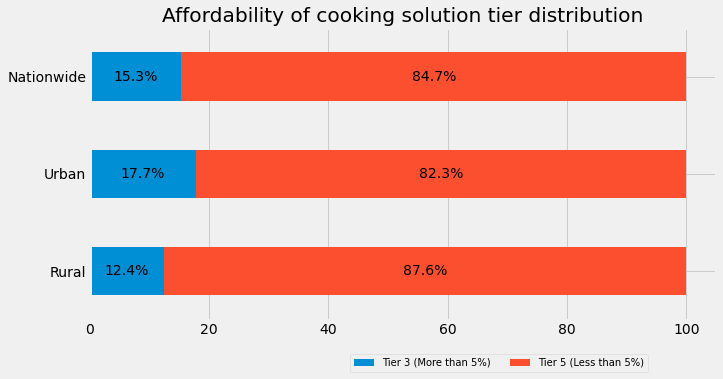

In [94]:
# Combining and ploting

affordability_all = pd.concat([affordability_rural, affordability_urban, affordability_nationwide], axis = 1)
plot = affordability_all.sort_index().T.plot(kind='barh', stacked=True, figsize = (10,5))

for bar in plot.patches:
    bar_width = bar.get_width()
    bar_height = bar.get_height()
    x_bar = bar.get_x()
    y_bar = bar.get_y()
    
    label = f'{bar_width:.1f}%'
    x_label = x_bar + bar_width / 2
    y_label = y_bar + bar_height / 2
    if bar_width > 3:
        plt.text(x_label, y_label, label, va = 'center', ha = 'center')
    
plt.title('Affordability of cooking solution tier distribution')
plt.legend(bbox_to_anchor=(0.9,- 0.1), ncol = 5, fontsize = 10);

> Affordability is more burdensome to urban households than rural households.

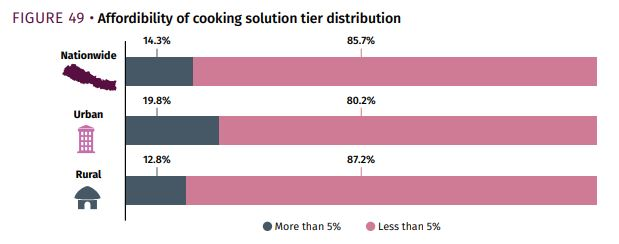

In [95]:
Image('references/affordability tier reports.JPG')